In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Reddit_Encoded.csv')
df

,comment,hate_speech,lemmatized_comment,document_vector_flat
0,subsection retarded hungarians ohh boy brace l...,1,subsection retard hungarians ohh boy brace liv...,"0.014043219,-0.01809359,0.017145459,0.08062436..."
1,hiii just got work Foundation and grounding ma...,0,hiii just get work Foundation and ground mainl...,"-0.0030388932,-0.035133556,0.020659983,0.07383..."
2,wow guess soyboys every country,0,wow guess soyboys every country,"0.017362628,0.005587179,0.0297773,0.109146975,..."
3,owen benjamins soyboy song goes every country ...,0,owen benjamins soyboy song go every country amaze,"0.018085241,0.0011954829,2.8959475e-05,0.07601..."
4,yall hear sumn means live small town rn for w...,0,yall hear sumn mean live small town rn for wor...,"0.023993038,-0.00060867134,0.005239945,0.05989..."
...,...,...,...,...
22206,op stop faggot post videos next time hard,1,op stop faggot post videos next time hard,"0.08339707,-0.017676119,-0.036872935,0.1038081..."
22207,minute long video top hate champagne goes need...,0,minute long video top hate champagne go need g...,"0.009342635,0.02728245,-0.0013451587,0.0765217..."
22208,clue whos ecelebs are point time need get alo...,1,clue whos ecelebs be point time need get along...,"-0.0006810841,0.008315975,0.029024707,0.077029..."
22209,didn’t insult you insult me,0,didn ’ t insult you insult me,"0.06474433,-0.17082486,-0.029483724,0.04382453..."


In [4]:
df['fasttext_vector'] = df['document_vector_flat'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))
X = np.vstack(df['fasttext_vector'].values)
y=df['hate_speech']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

### Applying SMOTE

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',random_state=42)
X_sm, y_sm = smote.fit_resample(X_train,y_train)
y_sm.value_counts()

0    13539
1    13539
Name: hate_speech, dtype: int64

### Time to train and compare our models!!

In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

### 1 . Logistic Regression¶

Logistic Regression is one of the oldest and most basic algorithms to solve a classification problem:

In [8]:
lr = LogisticRegression(max_iter=500)
scores_lr = cross_val_score(lr,X_sm,y_sm,cv=8)
print(scores_lr.mean(), scores_lr.std())

0.7431490640637495 0.016369678616386024


In [9]:
lr.fit(X_sm,y_sm)
y_pred_lr=lr.predict(X_test)

In [10]:
print("Logistic Regression Performancbe:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performancbe:
Confusion Matrix:
 [[2799  587]
 [ 293  764]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.86      3386
           1       0.57      0.72      0.63      1057

    accuracy                           0.80      4443
   macro avg       0.74      0.77      0.75      4443
weighted avg       0.82      0.80      0.81      4443



In [54]:
accuracy_lr=accuracy_score(y_test,y_pred_lr)
precision_lr=precision_score(y_test,y_pred_lr)
recall_lr=recall_score(y_test,y_pred_lr)
f1_lr=f1_score(y_test,y_pred_lr)
print(f"Accuracy:{accuracy:.2f}")
print(f"precision:{precision:.2f}")
print(f"recall:{recall:.2f}")
print(f"f1-score:{f1:.2f}")

Accuracy:0.84
precision:0.69
recall:0.61
f1-score:0.65


### 2 .Naive Bayes

The Naive Bayes method is a supervised learning algorithm based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

In [12]:
nb = GaussianNB()
scores_nb = cross_val_score(nb, X, y, cv = 8)
print(scores_nb.mean(), scores_nb.std())

0.4961486820776676 0.016438903904379486


In [13]:
nb.fit(X_sm,y_sm)
y_pred_nb=nb.predict(X_test)

In [14]:
print("Naive Bayes Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Performance:
Confusion Matrix:
 [[1215 2171]
 [ 233  824]]
              precision    recall  f1-score   support

           0       0.84      0.36      0.50      3386
           1       0.28      0.78      0.41      1057

    accuracy                           0.46      4443
   macro avg       0.56      0.57      0.45      4443
weighted avg       0.70      0.46      0.48      4443



In [55]:
accuracy_nb=accuracy_score(y_test,y_pred_nb)
precision_nb=precision_score(y_test,y_pred_nb)
recall_nb=recall_score(y_test,y_pred_nb)
f1_nb=f1_score(y_test,y_pred_nb)
print(f"Accuracy:{accuracy:.2f}")
print(f"precision:{precision:.2f}")
print(f"recall:{recall:.2f}")
print(f"f1:{f1:.2f}")

Accuracy:0.84
precision:0.69
recall:0.61
f1:0.65


### 3 . KNN

The k-nearest neighbors (KNN) algorithm is a supervised machine learning algorithm that can be used to solve both classification and regression problems. For KNN, it is known that it does not work so well with large datasets (high sample size) and in with many features (high dimensions) in particular.

In [16]:
knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, X, y, cv = 8)
print(scores_knn.mean(), scores_knn.std())

0.7515642366173768 0.010419572435279616


In [17]:
knn.fit(X_sm,y_sm)
y_pred_knn=knn.predict(X_test)

In [18]:
print("Knn Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Knn Performance:
Confusion Matrix:
 [[1143 2243]
 [ 103  954]]
              precision    recall  f1-score   support

           0       0.92      0.34      0.49      3386
           1       0.30      0.90      0.45      1057

    accuracy                           0.47      4443
   macro avg       0.61      0.62      0.47      4443
weighted avg       0.77      0.47      0.48      4443



In [56]:
accuracy_knn=accuracy_score(y_test,y_pred_knn)
precision_knn=precision_score(y_test,y_pred_knn)
recall_knn=recall_score(y_test,y_pred_knn)
f1_knn=f1_score(y_test,y_pred_knn)
print(f"Accuracy:{accuracy:.2f}")
print(f"precision:{precision:.2f}")
print(f"recall:{recall:.2f}")
print(f"f1:{f1:.2f}")

Accuracy:0.84
precision:0.69
recall:0.61
f1:0.65


### 4 . Random Forest

The Random Forest Algorithm is another frequently used ensemble learning classifier which uses multiple decision trees. The Random Forest classifier is basically a modified bagging algorithm of a Decision Tree that selects the subsets differently.

In [45]:
rand = RandomForestClassifier(n_estimators=300, max_depth=10)
scores_rand = cross_val_score(rand, X_sm,y_sm, cv = 6)
print(scores_rand.mean(), scores_rand.std())

0.8629514735209395 0.03302211397043384


In [58]:
rand.fit(X_sm,y_sm)
y_pred_rand=rand.predict(X_test)

In [59]:
print("Random Forest Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rand))
print(classification_report(y_test, y_pred_rand))

Random Forest Performance:
Confusion Matrix:
 [[2835  551]
 [ 362  695]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      3386
           1       0.56      0.66      0.60      1057

    accuracy                           0.79      4443
   macro avg       0.72      0.75      0.73      4443
weighted avg       0.81      0.79      0.80      4443



In [60]:
accuracy_rand=accuracy_score(y_test,y_pred_rand)
precision_rand=precision_score(y_test,y_pred_rand)
recall_rand=recall_score(y_test,y_pred_rand)
f1_rand=f1_score(y_test,y_pred_rand)
print(f"Accuracy:{accuracy:.2f}")
print(f"precision:{precision:.2f}")
print(f"recall:{recall:.2f}")
print(f"f1:{f1:.2f}")

Accuracy:0.84
precision:0.69
recall:0.61
f1:0.65


### 5.Decision Tree

A Decision Tree is a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules (if-else) inferred from the data features.

In [20]:
tr = DecisionTreeClassifier()
scores_tr = cross_val_score(tr, X_sm, y_sm, cv = 6)
print(scores_tr.mean(), scores_tr.std())

0.7821847994682031 0.0290241534104655


In [21]:
tr.fit(X_sm,y_sm)
y_pred_tr=tr.predict(X_test)

In [39]:
print("Decision Tree Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tr))
print(classification_report(y_test, y_pred_tr))

Decision Tree Performance:
Confusion Matrix:
 [[2574  812]
 [ 496  561]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      3386
           1       0.41      0.53      0.46      1057

    accuracy                           0.71      4443
   macro avg       0.62      0.65      0.63      4443
weighted avg       0.74      0.71      0.72      4443



In [61]:
accuracy_tr=accuracy_score(y_test,y_pred_tr)
precision_tr=precision_score(y_test,y_pred_tr)
recall_tr=recall_score(y_test,y_pred_tr)
f1_tr=f1_score(y_test,y_pred_tr)
print(f"Accuracy:{accuracy:.2f}")
print(f"precision:{precision:.2f}")
print(f"recall:{recall:.2f}")
print(f"f1:{f1:.2f}")

Accuracy:0.84
precision:0.69
recall:0.61
f1:0.65


### 6.Neural Network

Deep learning uses an artificial neural network that uses multiple layers to progressively extract higher level features from the training data. We are using a simple three-layer network without any optimisation, except the usage of a small validation dataset. Here we are using Keras instead of Sklearn.

In [33]:
mlp = MLPClassifier(max_iter=300)

In [37]:
scores_mlp = cross_val_score(mlp, X_sm, y_sm, cv = 8)
print(scores_mlp.mean(), scores_mlp.std())

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

0.9192721482796791 0.03730946831838785


C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
mlp.fit(X_sm,y_sm)
y_pred_mlp=mlp.predict(X_test)

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
print("Neural network Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

Neural network Performance:
Confusion Matrix:
 [[3051  335]
 [ 354  703]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3386
           1       0.68      0.67      0.67      1057

    accuracy                           0.84      4443
   macro avg       0.79      0.78      0.78      4443
weighted avg       0.84      0.84      0.84      4443



In [62]:
accuracy_mlp=accuracy_score(y_test,y_pred_mlp)
precision_mlp=precision_score(y_test,y_pred_mlp)
recall_mlp=recall_score(y_test,y_pred_mlp)
f1_mlp=f1_score(y_test,y_pred_mlp)
print(f"Accuracy:{accuracy:.2f}")
print(f"precision:{precision:.2f}")
print(f"recall:{recall:.2f}")
print(f"f1:{f1:.2f}")

Accuracy:0.84
precision:0.69
recall:0.61
f1:0.65


### 7 .Support Vector Machine - SVM

The Support Vector Machine is a simple algorithm for classification and regression tasks. It can provide high accuracy with less computation power very fast. Due to the large number of features, we are using the LinearSVC. It turned out that setting the regularisation parameter C=0.0001 improves the quality of the prediction and reduces overfitting.

In [25]:
sv = LinearSVC(C=0.0001)
scores_sv = cross_val_score(sv, X_sm, y_sm, cv = 8)
print(scores_sv.mean(), scores_sv.std())

0.6734608362054817 0.020286463934128075


In [26]:
sv.fit(X_sm,y_sm)
y_pred_sv=sv.predict(X_test)

In [27]:
print("Support Vector Machine Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sv))
print(classification_report(y_test, y_pred_sv))

Support Vector Machine Performance:
Confusion Matrix:
 [[2672  714]
 [ 420  637]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3386
           1       0.47      0.60      0.53      1057

    accuracy                           0.74      4443
   macro avg       0.67      0.70      0.68      4443
weighted avg       0.77      0.74      0.75      4443



In [63]:
accuracy_sv=accuracy_score(y_test,y_pred_sv)
precision_sv=precision_score(y_test,y_pred_sv)
recall_sv=recall_score(y_test,y_pred_sv)
f1_sv=f1_score(y_test,y_pred_sv)
print(f"Accuracy:{accuracy:.2f}")
print(f"precision:{precision:.2f}")
print(f"recall:{recall:.2f}")
print(f"f1:{f1:.2f}")

Accuracy:0.84
precision:0.69
recall:0.61
f1:0.65


### 8 .Voting

This classifier from the ensemble learning toolbox evaluates different classifiers and selects the best out of it.

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities to predict the class labels. Such a classifier can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

So let’s use this classifier to combine some of the models we had so far and apply the Voting Classifier on:

- Gradient Boossting
- Random forest
- Logistique Regression
- Decision Tree

In [46]:
evc=VotingClassifier(estimators=[('sv',sv),('lr',lr),('mlp',mlp),('rand',rand)],voting='hard')
scores_evc = cross_val_score(evc, X_sm, y_sm, cv = 8)
print(scores_evc.mean(), scores_evc.std())

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

0.7897183199416142 0.00788567054812239


In [47]:
evc.fit(X_sm,y_sm)
y_pred_evc=evc.predict(X_test)

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [48]:
print("voting classifier Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_evc))
print(classification_report(y_test, y_pred_evc))

voting classifier Performance:
Confusion Matrix:
 [[3102  284]
 [ 417  640]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3386
           1       0.69      0.61      0.65      1057

    accuracy                           0.84      4443
   macro avg       0.79      0.76      0.77      4443
weighted avg       0.84      0.84      0.84      4443



In [64]:
accuracy_evc=accuracy_score(y_test,y_pred_evc)
precision_evc=precision_score(y_test,y_pred_evc)
recall_evc=recall_score(y_test,y_pred_evc)
f1_evc=f1_score(y_test,y_pred_evc)
print(f"Accuracy:{accuracy:.2f}")
print(f"precision:{precision:.2f}")
print(f"recall:{recall:.2f}")
print(f"f1:{f1:.2f}")

Accuracy:0.84
precision:0.69
recall:0.61
f1:0.65


### 9.Boosting Decision Tree

In general, we can’t use Boosting to improve a completely overfitted model with score = 1. To apply Boosting, we first have to tweak the decision tree classifier a bit. It took me some trial and error until I got the best parameters for the Decision Tree and the AdaBoost Classifier. I am sure you can further improve by playing around a bit more

In [29]:
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
scores_adb = cross_val_score(adb, X_sm, y_sm, cv = 8)
print(scores_adb.mean(), scores_adb.std())

0.8058218512873161 0.03439025736938702


In [30]:
adb.fit(X_sm,y_sm)
y_pred_adb=adb.predict(X_test)

In [31]:
print("Ada Boost Classifier Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adb))
print(classification_report(y_test, y_pred_adb))

Ada Boost Classifier Performance:
Confusion Matrix:
 [[2645  741]
 [ 305  752]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      3386
           1       0.50      0.71      0.59      1057

    accuracy                           0.76      4443
   macro avg       0.70      0.75      0.71      4443
weighted avg       0.80      0.76      0.78      4443



In [65]:
accuracy_adb=accuracy_score(y_test,y_pred_adb)
precision_adb=precision_score(y_test,y_pred_adb)
recall_adb=recall_score(y_test,y_pred_adb)
f1_adb=f1_score(y_test,y_pred_adb)
print(f"Accuracy:{accuracy:.2f}")
print(f"precision:{precision:.2f}")
print(f"recall:{recall:.2f}")
print(f"f1:{f1:.2f}")

Accuracy:0.84
precision:0.69
recall:0.61
f1:0.65


### Comparing ML Models

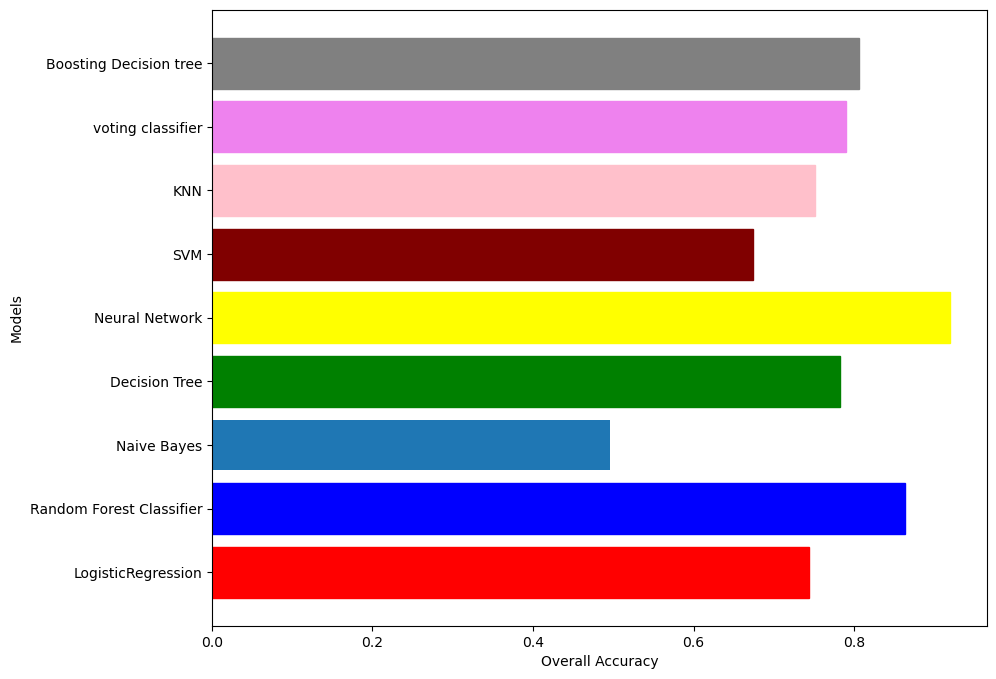

In [71]:
names = ['LogisticRegression' , 'Random Forest Classifier','Naive Bayes','Decision Tree','Neural Network','SVM',
        'KNN','voting classifier','Boosting Decision tree']
acc = [scores_lr.mean(),scores_rand.mean(),scores_nb.mean(),scores_tr.mean(),scores_mlp.mean(),scores_sv.mean(),
      scores_knn.mean(),scores_evc.mean(),scores_adb.mean()]

plt.figure(figsize=(10,8))
graph = plt.barh(names,acc)
plt.xlabel('Overall Accuracy')
plt.ylabel('Models')    
graph[0].set_color('red')
graph[1].set_color('blue')
graph[3].set_color('green')
graph[4].set_color('yellow')
graph[5].set_color('maroon')
graph[6].set_color('pink')
graph[7].set_color('violet')
graph[8].set_color('grey')

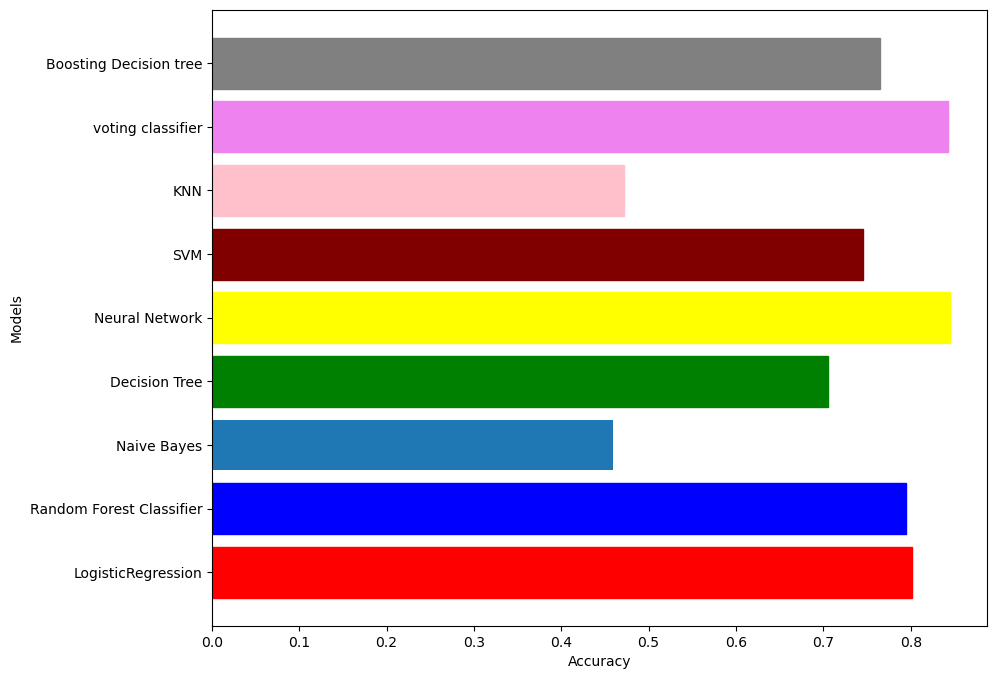

In [66]:
names = ['LogisticRegression' , 'Random Forest Classifier','Naive Bayes','Decision Tree','Neural Network','SVM',
        'KNN','voting classifier','Boosting Decision tree']
acc = [accuracy_lr,accuracy_rand,accuracy_nb,accuracy_tr,accuracy_mlp,accuracy_sv,accuracy_knn,accuracy_evc,accuracy_adb]

plt.figure(figsize=(10,8))
graph = plt.barh(names,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')    
graph[0].set_color('red')
graph[1].set_color('blue')
graph[3].set_color('green')
graph[4].set_color('yellow')
graph[5].set_color('maroon')
graph[6].set_color('pink')
graph[7].set_color('violet')
graph[8].set_color('grey')

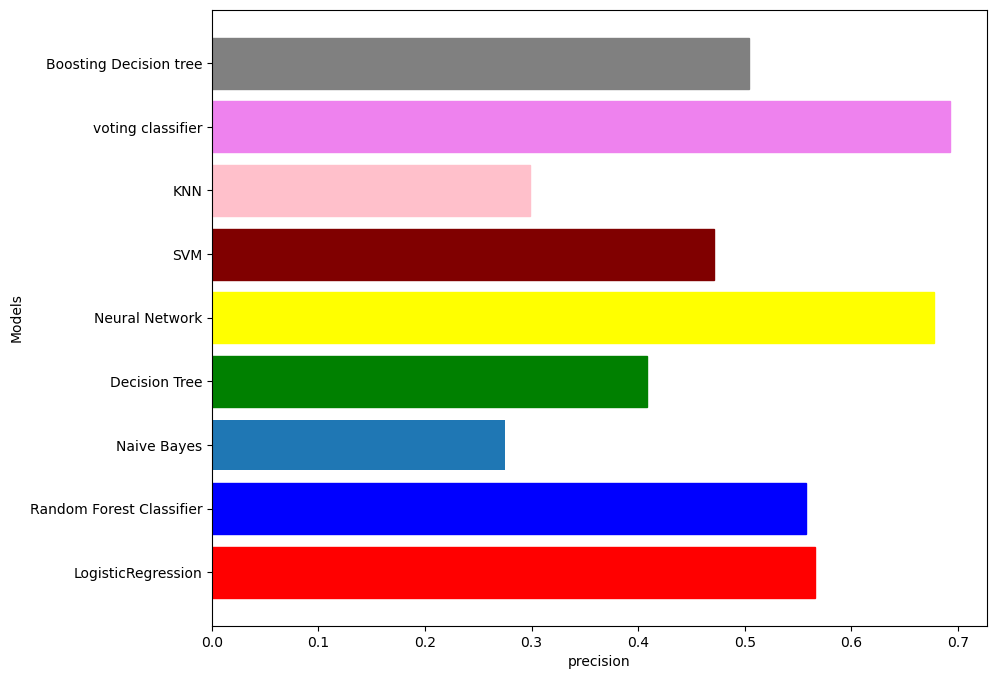

In [72]:
names = ['LogisticRegression' , 'Random Forest Classifier','Naive Bayes','Decision Tree','Neural Network','SVM',
        'KNN','voting classifier','Boosting Decision tree']
acc = [precision_lr,precision_rand,precision_nb,precision_tr,precision_mlp,precision_sv,precision_knn,precision_evc,precision_adb]

plt.figure(figsize=(10,8))
graph = plt.barh(names,acc)
plt.xlabel('precision')
plt.ylabel('Models')    
graph[0].set_color('red')
graph[1].set_color('blue')
graph[3].set_color('green')
graph[4].set_color('yellow')
graph[5].set_color('maroon')
graph[6].set_color('pink')
graph[7].set_color('violet')
graph[8].set_color('grey')

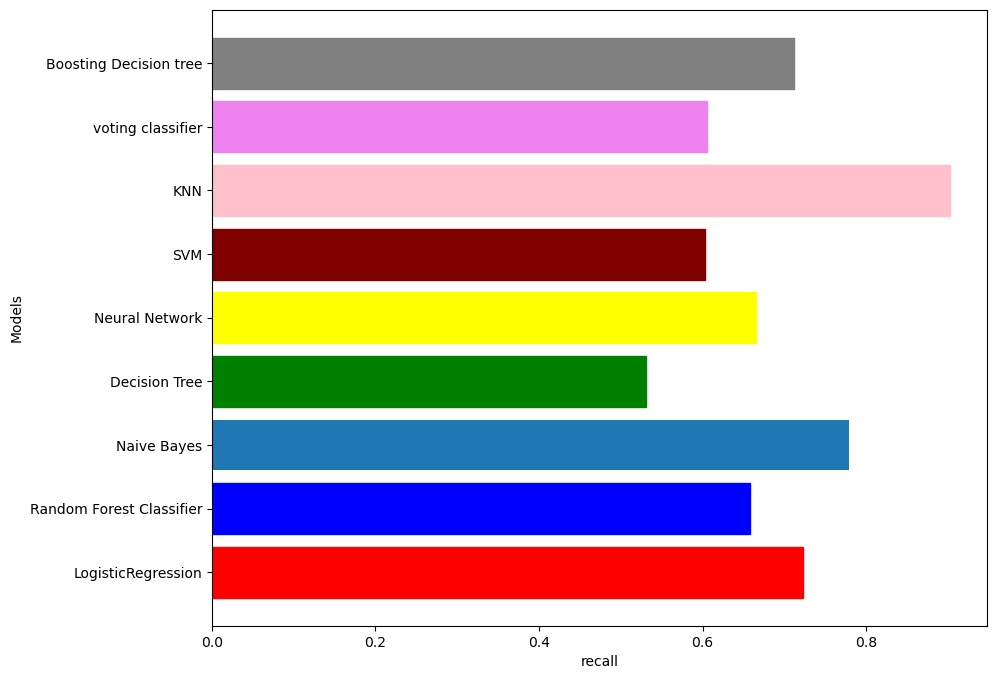

In [73]:
names = ['LogisticRegression' , 'Random Forest Classifier','Naive Bayes','Decision Tree','Neural Network','SVM',
        'KNN','voting classifier','Boosting Decision tree']
acc = [recall_lr,recall_rand,recall_nb,recall_tr,recall_mlp,recall_sv,recall_knn,recall_evc,recall_adb]

plt.figure(figsize=(10,8))
graph = plt.barh(names,acc)
plt.xlabel('recall')
plt.ylabel('Models')    
graph[0].set_color('red')
graph[1].set_color('blue')
graph[3].set_color('green')
graph[4].set_color('yellow')
graph[5].set_color('maroon')
graph[6].set_color('pink')
graph[7].set_color('violet')
graph[8].set_color('grey')

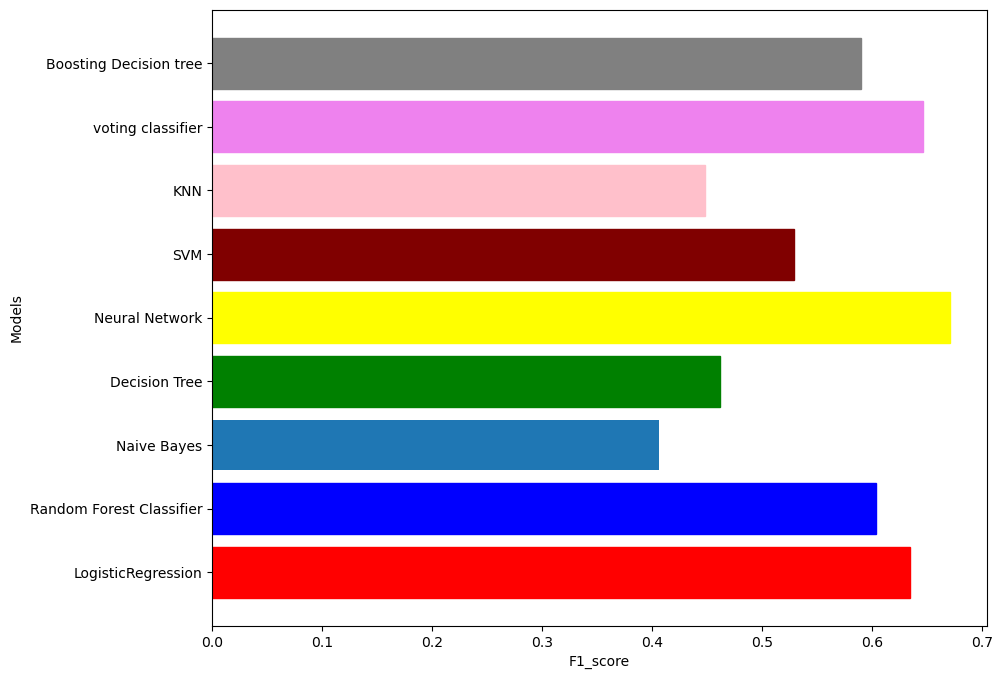

In [75]:
names = ['LogisticRegression' , 'Random Forest Classifier','Naive Bayes','Decision Tree','Neural Network','SVM',
        'KNN','voting classifier','Boosting Decision tree']
acc = [f1_lr,f1_rand,f1_nb,f1_tr,f1_mlp,f1_sv,f1_knn,f1_evc,f1_adb]

plt.figure(figsize=(10,8))
graph = plt.barh(names,acc)
plt.xlabel('F1_score')
plt.ylabel('Models')    
graph[0].set_color('red')
graph[1].set_color('blue')
graph[3].set_color('green')
graph[4].set_color('yellow')
graph[5].set_color('maroon')
graph[6].set_color('pink')
graph[7].set_color('violet')
graph[8].set_color('grey')